In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df_SAPR = pd.read_excel('SAPR3.xlsx')
df_Esmeralda = pd.read_excel('Esmeralda.xlsx')
df_Peñas = pd.read_excel('Peñas.xlsx')

In [7]:
'''diff
Today we're here to ask and answer one simple question:
- Is our children learning?
+ Is Modulo related to plant data?
'''

"diff\nToday we're here to ask and answer one simple question:\n- Is our children learning?\n+ Is Modulo related to plant data?\n"

In [ ]:
###STEPS
#1 - Break down datasets into times
#2 - Break down datasets into strategy
#3 - Break down datasets into type (if applicable)

### OR ###
#Concatenate the columns in the above 3 distinctions into its own column, should provide the groups we need.
#Chart various group heights


In [29]:
#I think you can actually tier by keys in groupby, so this may not be necessary.
df_Esmeralda['Grupos'] = df_Esmeralda['Even_mon'].astype(str) +"-"+ df_Esmeralda['Escenario'].astype(str) +'-'+ df_Esmeralda['Tipo'].astype(str)

In [58]:
#most of the data is classified as "object" so we need to convert to a more useful dtype.
df_Esmeralda = df_Esmeralda.convert_dtypes()
keys = ['Alt_Ind','DAB1_Ind','DAB_Prom','Diam1_Ind','Diam2_Ind']
for item in keys:
    df_Esmeralda[item] = pd.to_numeric(df_Esmeralda[item], errors='coerce')

In [64]:
df_Esmeralda.dtypes

Fecha             datetime64[ns]
Even_mon                  string
ID                         Int64
Especie                   string
Escenario                 string
Estrategia                string
Tipo                       Int64
No_Nuc/Faj/Mod             Int64
Línea                      Int64
No_Ind                     Int64
Sup_Ind                   string
Est_Fit                    Int64
COL                       string
VB                        string
HER                       string
PAT                       string
COM                       string
DM                        string
ANE                       string
PNE                       string
Alt_Ind                  float64
DAB1_Ind                 float64
DAB2_Ind                   Int64
DAB_Prom                 float64
Diam1_Ind                float64
Diam2_Ind                float64
Area_cop_Ind             Float64
Observaciones             string
Grupos                    string
dtype: object

In [74]:
#Group by averages
e_grup = df_Esmeralda.groupby(by='Grupos').mean()
e_grup2 = df_Esmeralda.groupby(['Grupos','No_Nuc/Faj/Mod']).mean()

In [75]:
e_grup2

ID  Tipo  Línea  No_Ind   Est_Fit  \
Grupos                 No_Nuc/Faj/Mod                                          
T1-Bosque-nan          1               3440.0  <NA>   <NA>     4.0       0.0   
                       3               3447.0  <NA>   <NA>     4.0  2.857143   
                       5               3454.0  <NA>   <NA>     4.0  1.571429   
                       7               3461.0  <NA>   <NA>     4.0  3.285714   
                       9               3468.0  <NA>   <NA>     4.0  2.142857   
...                                       ...   ...    ...     ...       ...   
T3-Veg. Secundaria-nan 37              3955.0  <NA>   <NA>     4.0  3.714286   
                       39              3962.0  <NA>   <NA>     4.0       4.0   
                       41              3969.0  <NA>   <NA>     4.0  3.857143   
                       43              3976.0  <NA>   <NA>     4.0  3.857143   
                       45              3983.0  <NA>   <NA>     4.0  3.428571   

                                          Alt_Ind   DAB1_Ind  DAB2_Ind  \
Grupos                 No_Nuc/Faj/Mod                                    
T1-Bosque-nan          1                62.714286   8.285714      <NA>   
                       3                43.142857   9.428571      <NA>   
                       5                55.285714  11.142857      <NA>   
                       7                46.714286   9.571429      <NA>   
                       9                50.714286   9.571429      <NA>   
...                                           ...        ...       ...   
T3-Veg. Secundaria-nan 37               56.571429  11.857143      <NA>   
                       39               62.857143   8.142857      <NA>   
                       41               53.000000   5.428571      <NA>   
                       43              136.714286  19.714286      <NA>   
                       45              161.714286  45.571429      <NA>   

                                        DAB_Prom  Diam1_Ind  Diam2_Ind  \
Grupos                 No_Nuc/Faj/Mod                                    
T1-Bosque-nan          1                8.285714  54.428571  52.571429   
                       3                9.428571  26.000000  23.000000   
                       5               11.142857  21.200000  10.800000   
                       7                9.571429  12.500000  10.500000   
                       9                9.571429  15.800000  15.600000   
...                                          ...        ...        ...   
T3-Veg. Secundaria-nan 37              11.857143  55.857143  57.857143   
                       39               8.142857  48.571429  44.285714   
                       41               5.428571  50.428571  32.428571   
                       43              19.714286  87.428571  91.142857   
                       45              45.571429  82.428571  84.571429   

                                       Area_cop_Ind  
Grupos                 No_Nuc/Faj/Mod                
T1-Bosque-nan          1                1427.071429  
                       3                  84.285714  
                       5                 120.071429  
                       7                  25.714286  
                       9                 154.785714  
...                                             ...  
T3-Veg. Secundaria-nan 37               1731.357143  
                       39               1109.857143  
                       41                803.714286  
                       43               4082.785714  
                       45               3557.642857  

[435 rows x 12 columns]

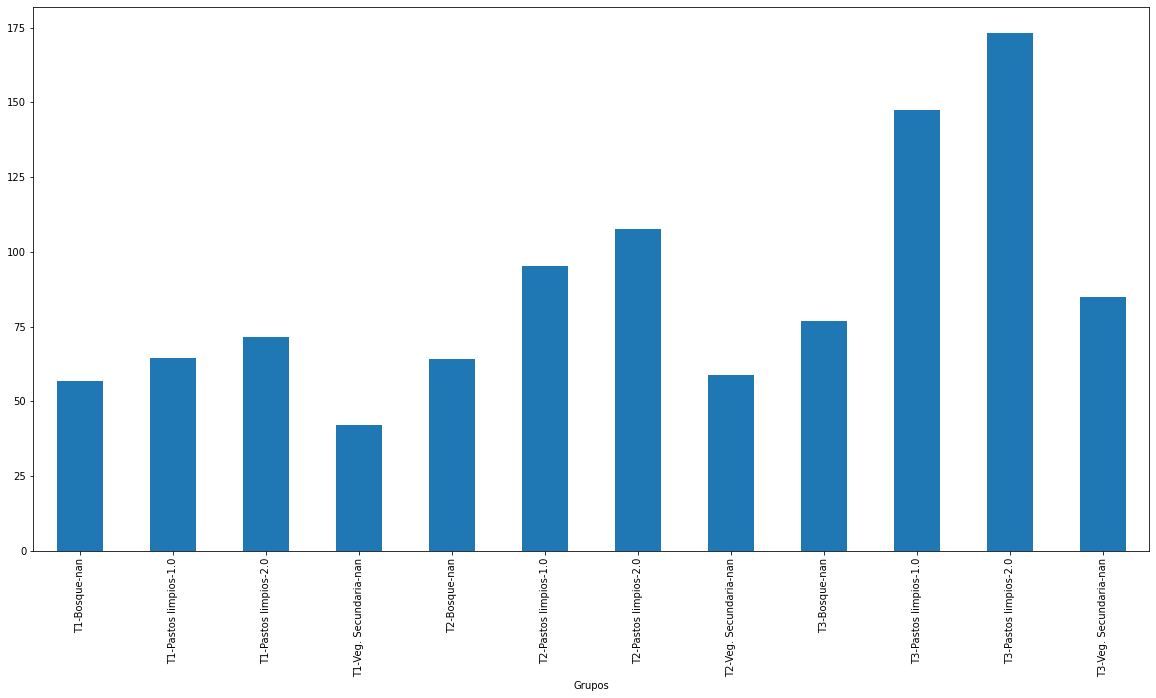

In [70]:
plt.figure(figsize=(20,10))
e_grup['Alt_Ind'].plot(kind='bar');
#This chart shows us that average height has increased over time, with pastos being the fastest
#Vegetacion secundaria seems to be growing faster than bosque

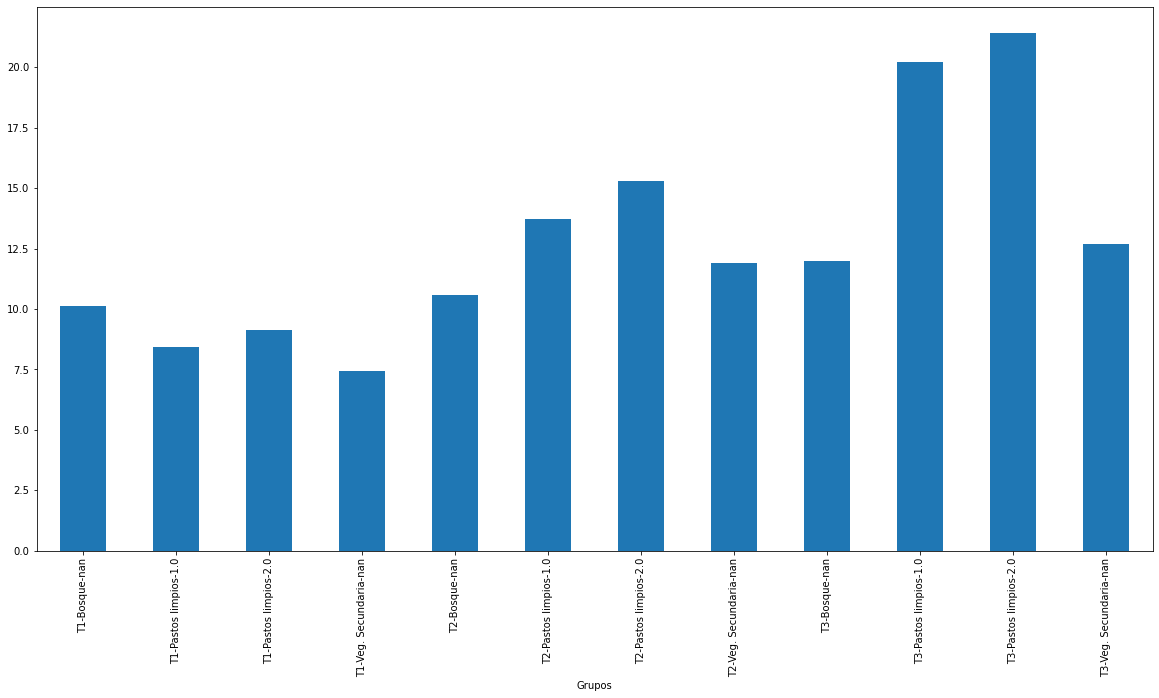

In [71]:
plt.figure(figsize=(20,10))
e_grup['DAB1_Ind'].plot(kind='bar');
#Grouping by diameter seems to show the same kind of trend as above, but less pronounced.

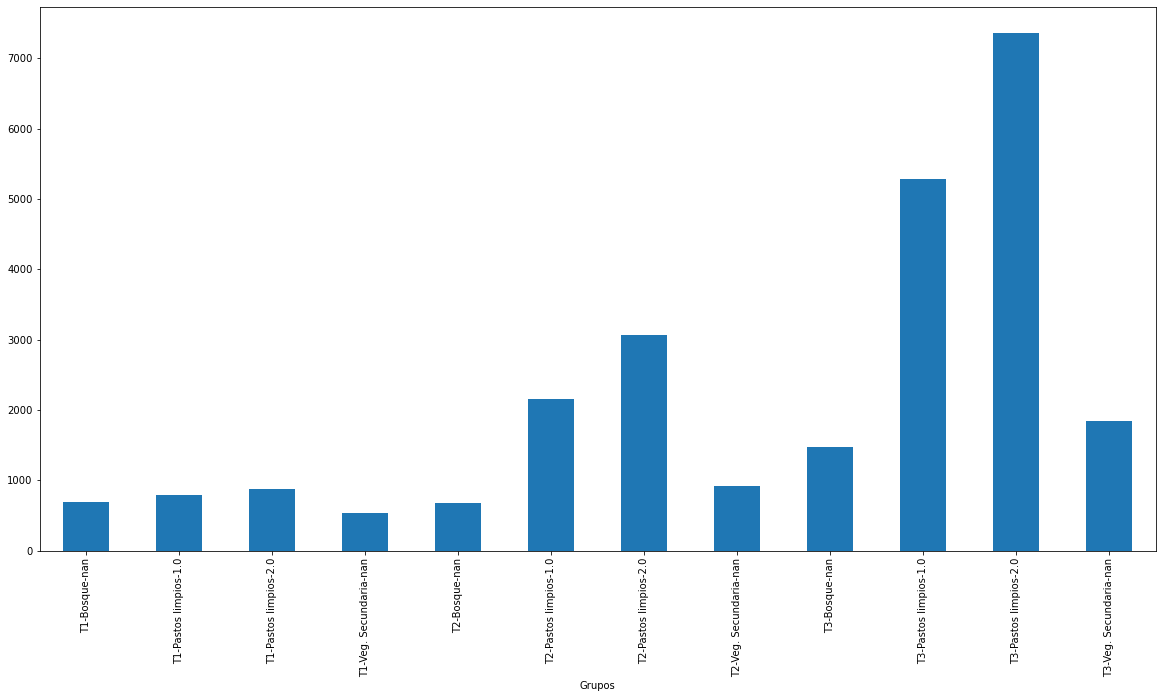

In [73]:
plt.figure(figsize=(20,10))
e_grup['Area_cop_Ind'].plot(kind='bar');
#dang them grassy areas do be growin'
#Same trend as above but exponential. Makes sense.

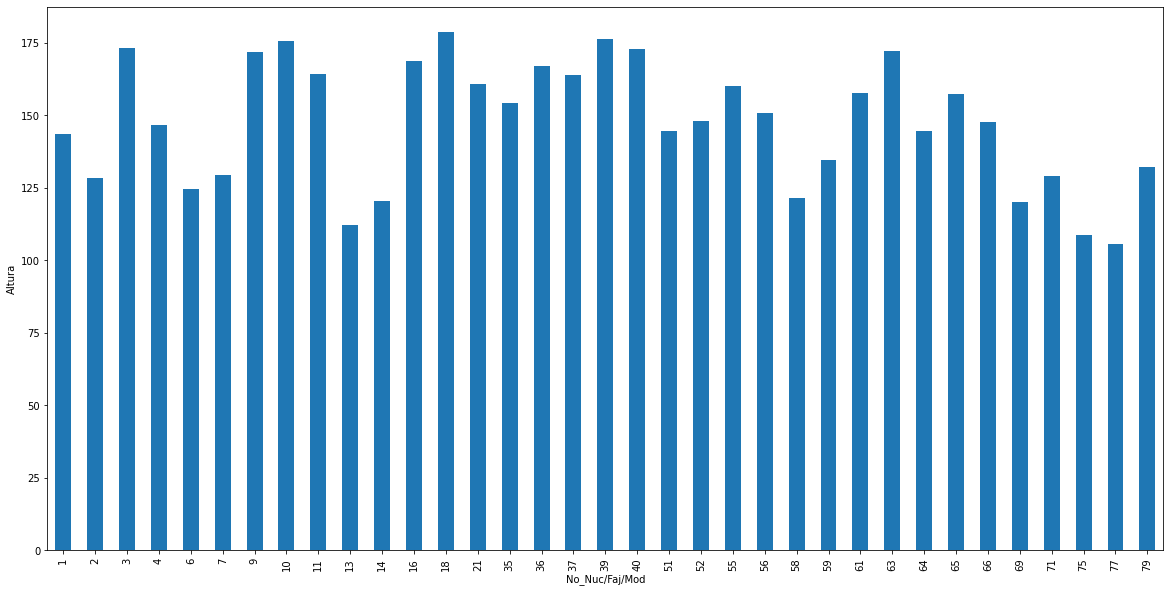

In [83]:
plt.figure(figsize=(20,10))
plt.ylabel('Altura')
e_grup2.loc['T3-Pastos limpios-1.0']['Alt_Ind'].plot(kind='bar');
#Hard to tell if there's a pattern here without plotting on a map.

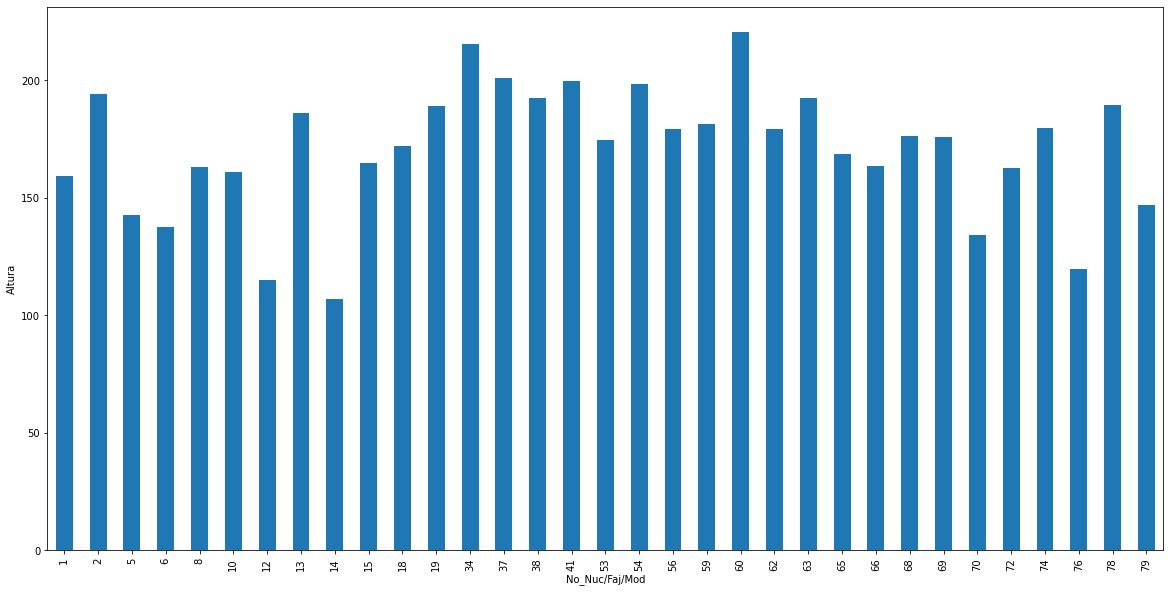

In [84]:
plt.figure(figsize=(20,10))
plt.ylabel('Altura')
e_grup2.loc['T3-Pastos limpios-2.0']['Alt_Ind'].plot(kind='bar');
#There might be some relation here. Earlier ones and later ones seem to have lower heights on average.
#Maybe there's some way to group them based on location.

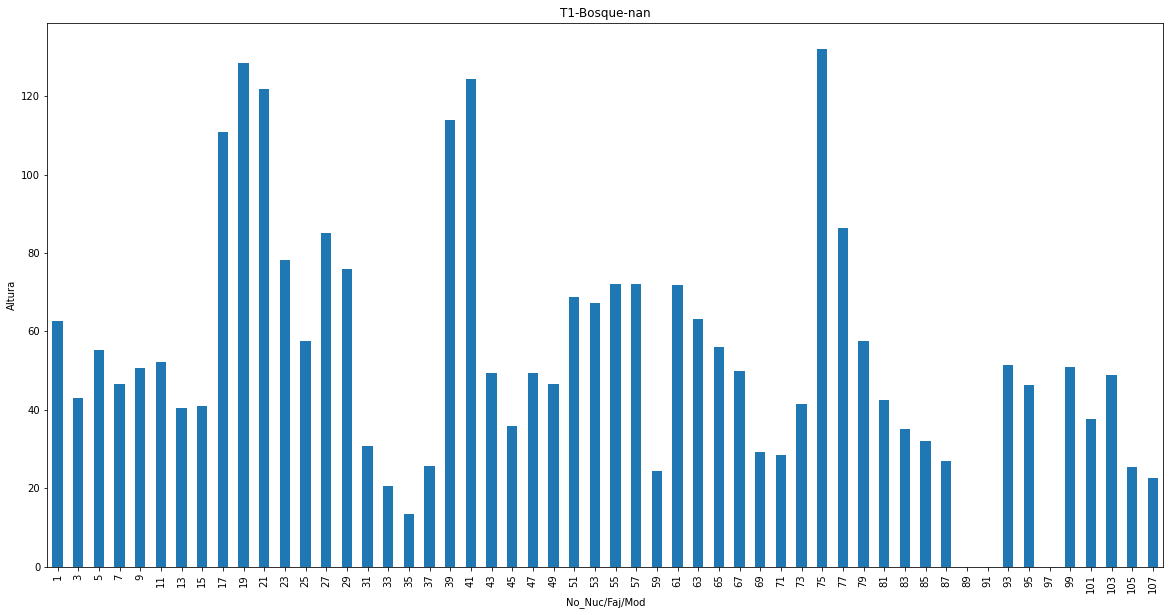

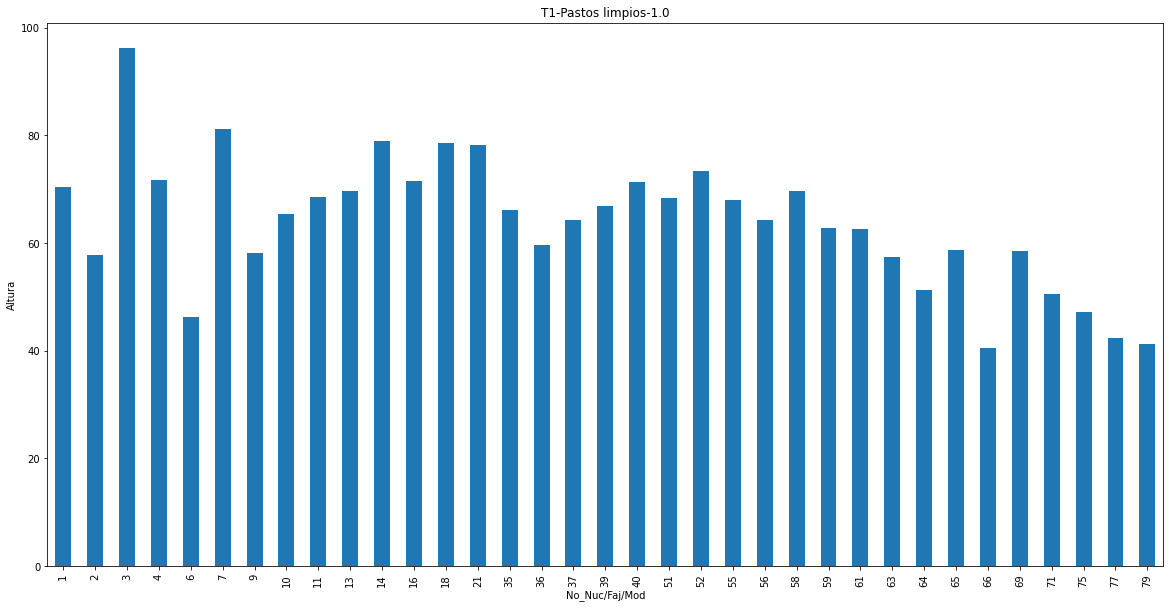

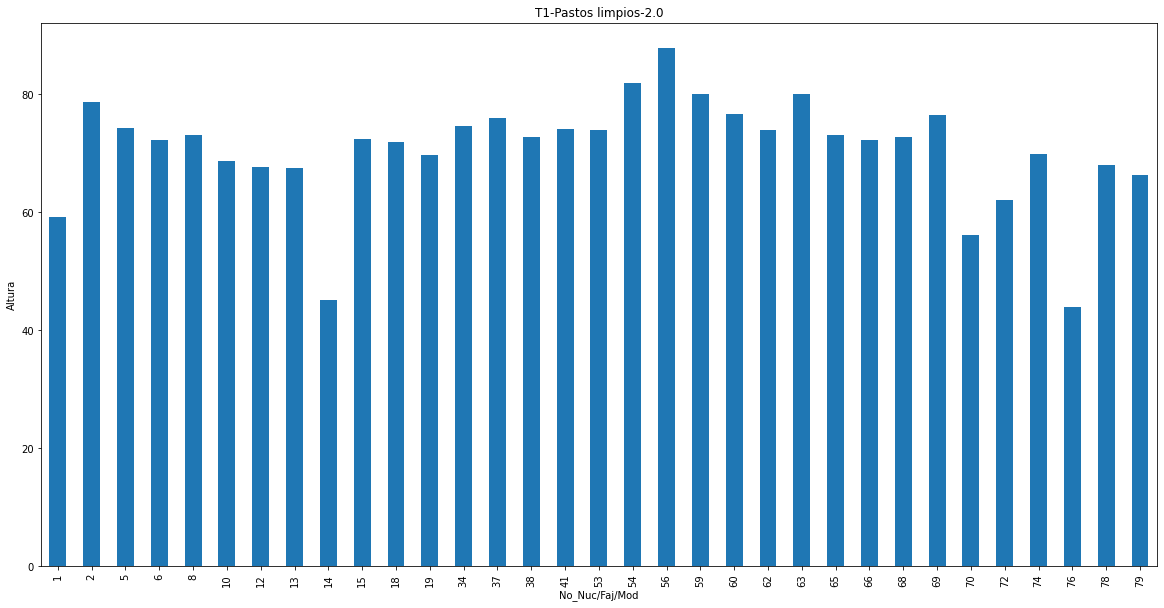

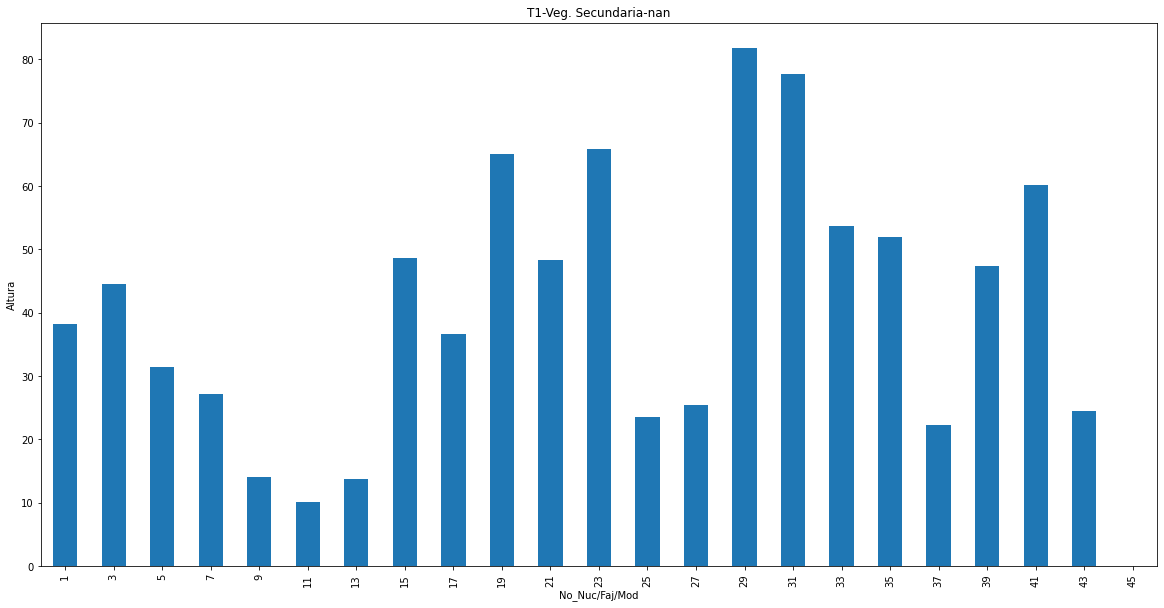

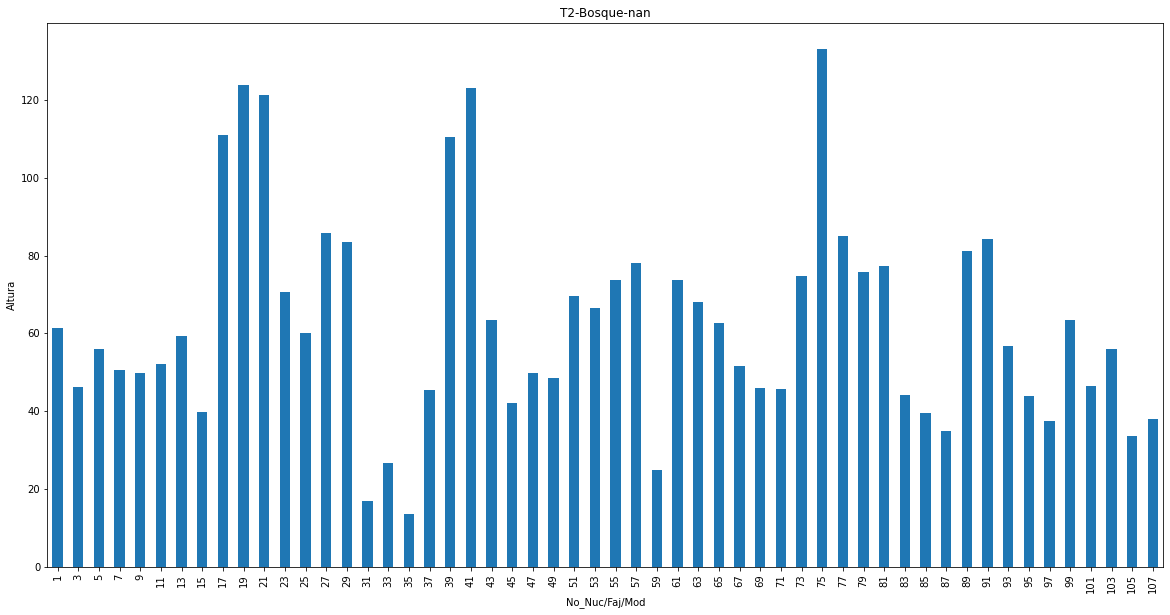

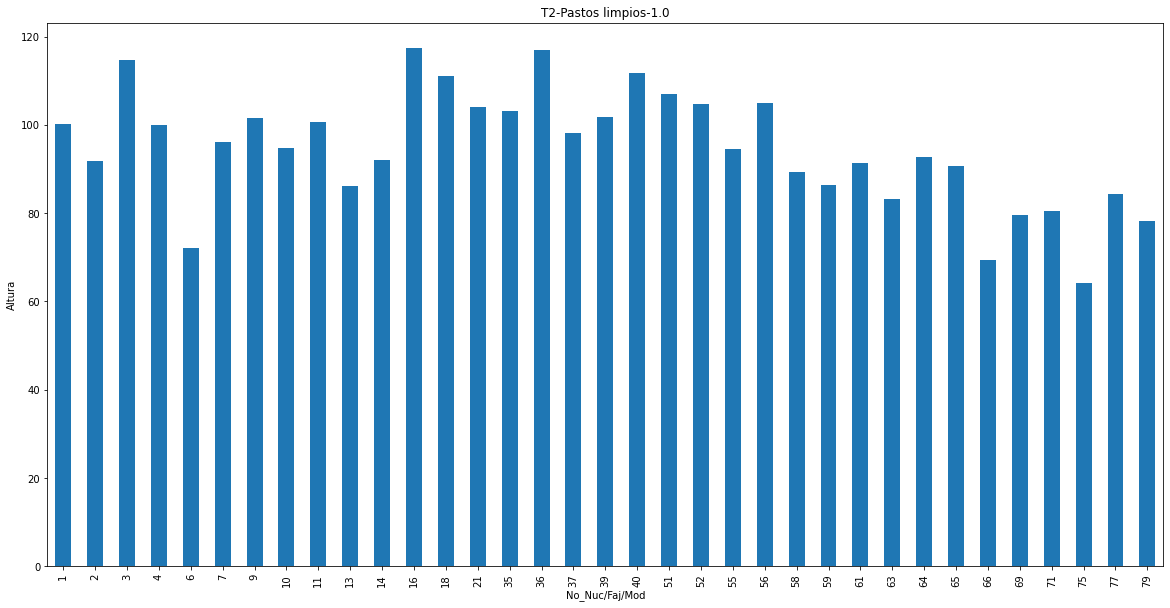

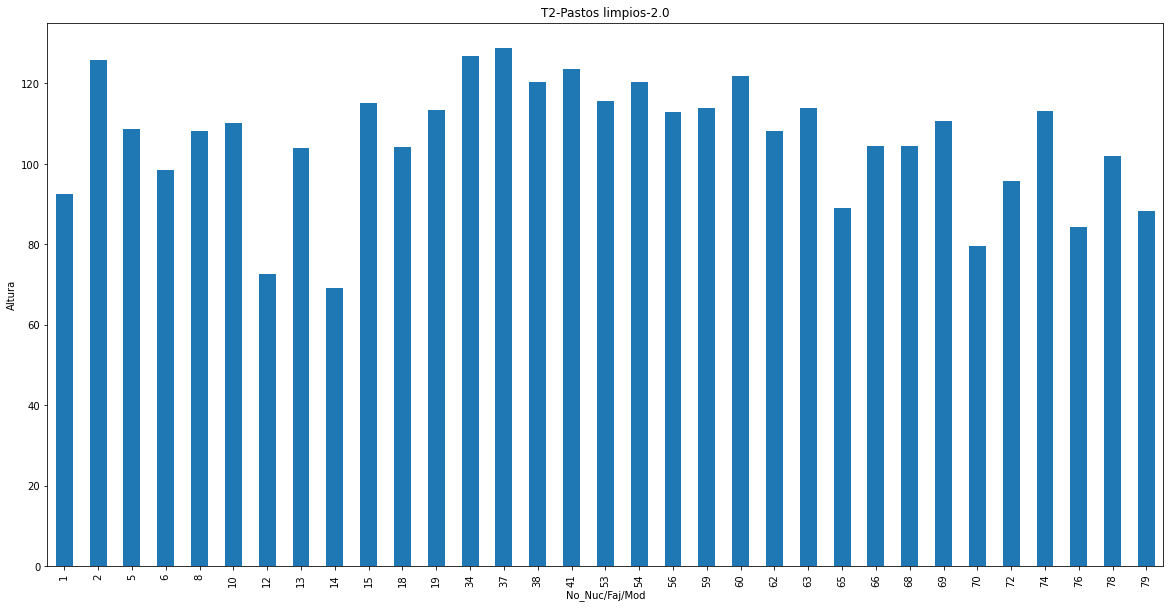

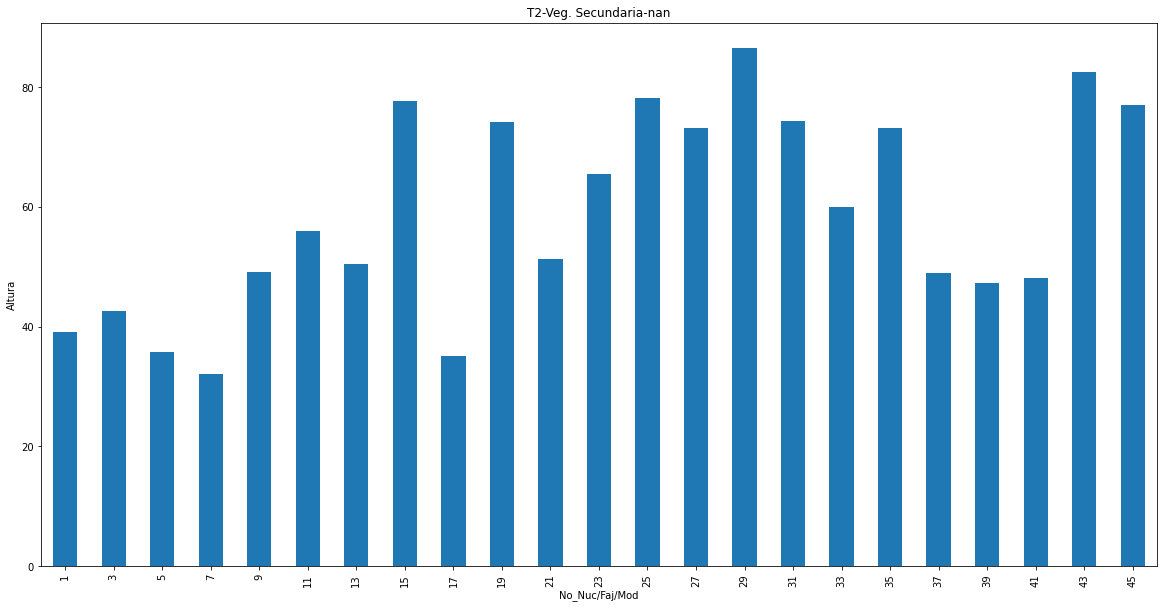

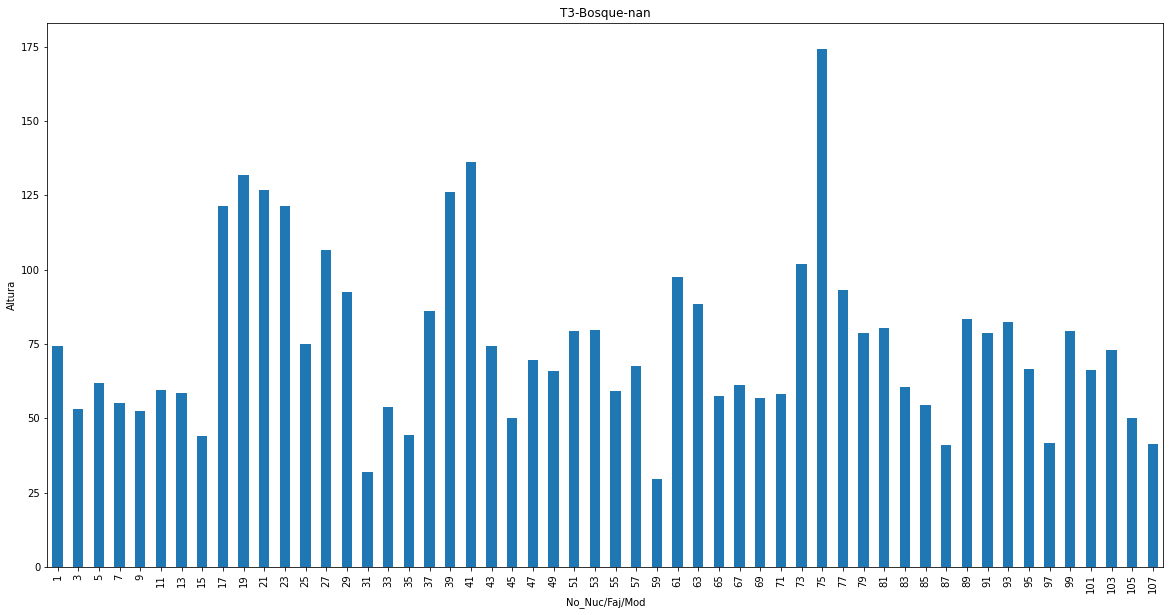

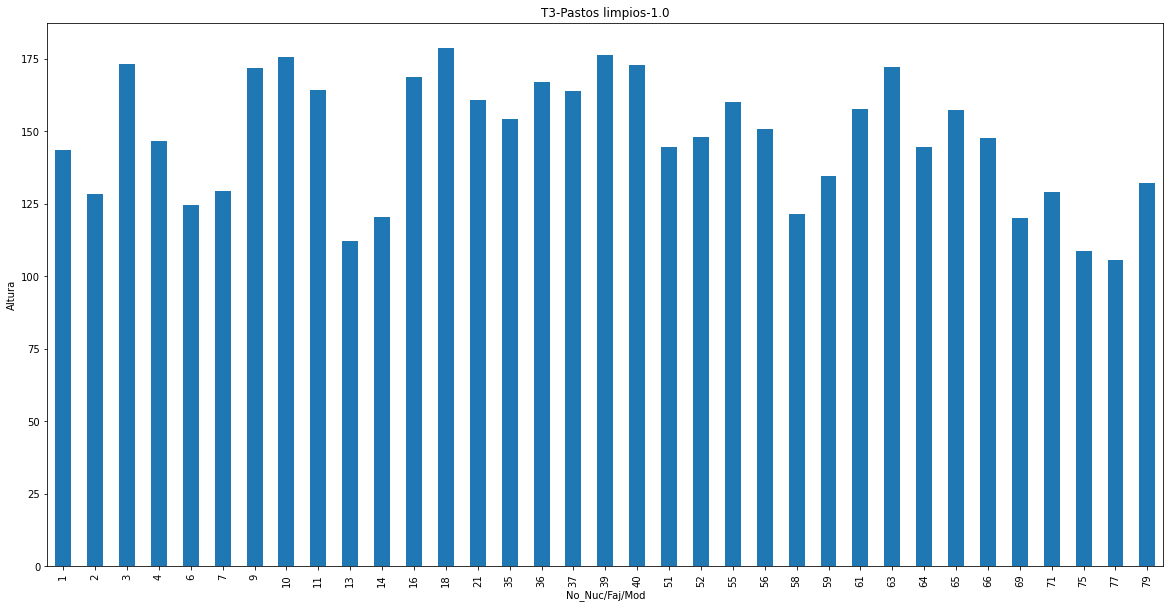

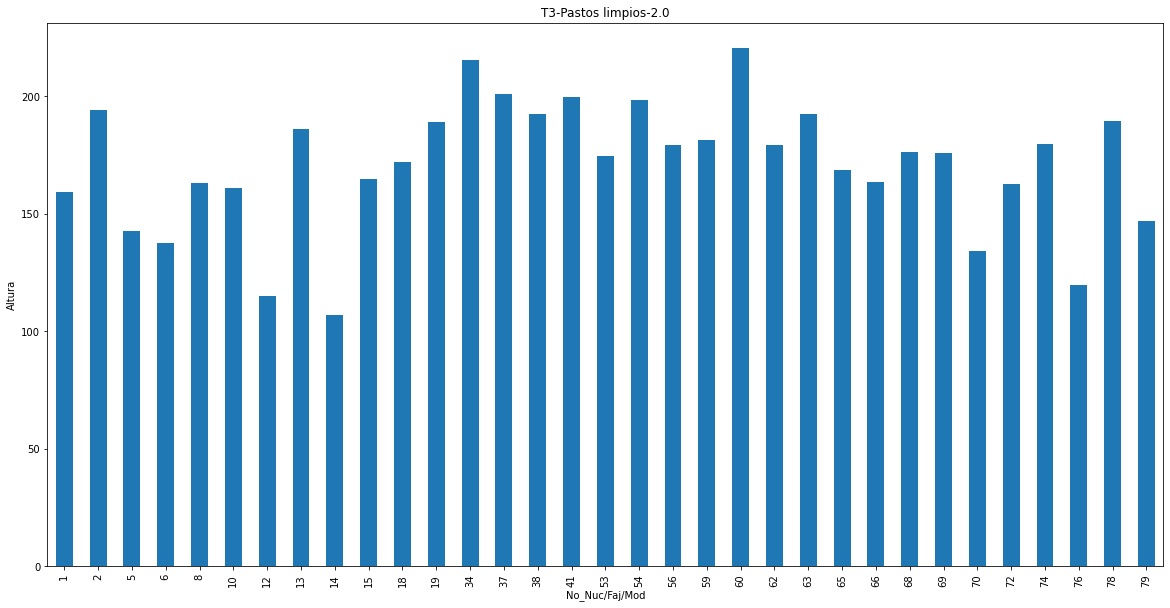

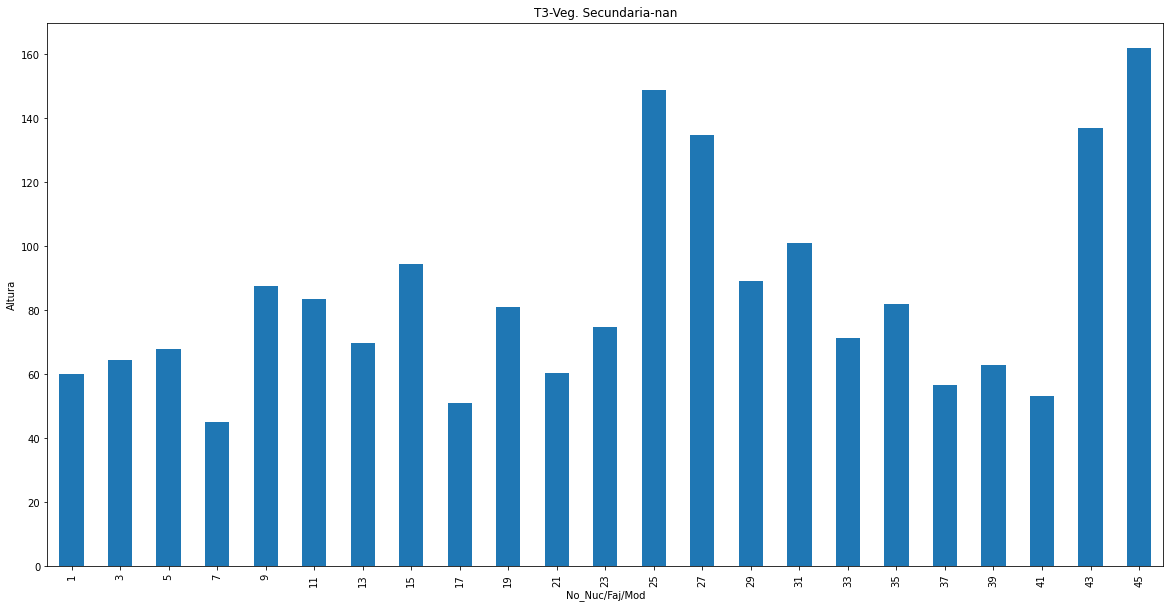

In [91]:
for item in e_grup.index:
    plt.figure(figsize=(20,10))
    plt.ylabel('Altura')
    plt.title(item)
    e_grup2.loc[item]['Alt_Ind'].plot(kind='bar');

In [92]:
#Just save all your data cleaning at the end
aggwriter = pd.ExcelWriter('SAPR3.xlsx', engine='openpyxl')
esmwriter = pd.ExcelWriter('Esmeralda.xlsx', engine='openpyxl')
penwriter = pd.ExcelWriter('Peñas.xlsx', engine='openpyxl')
df_SAPR.to_excel(aggwriter, index=False, engine='openpyxl')
df_Esmeralda.to_excel(esmwriter, index=False, engine='openpyxl')
df_Peñas.to_excel(penwriter, index=False, engine='openpyxl')
aggwriter.save()
esmwriter.save()
penwriter.save()